In [5]:
from neuron_test import modelSetUp
from neuron_test import Neuron_model_extended
import os
import bluepyopt.ephys as ephys
import matplotlib.pyplot as plt

In [2]:
%cd manual/

/home/jofrony/Documents/Repositories/SingleNeuronExperiments/optimisation/single-cell/sbj4-170614_cell6/manual


In [3]:
opt_dir = "../sbj4-170614_cell6/"

In [4]:
name = "sbj4170614_cell6"
modelFile = os.path.abspath("modelParameter-sub.txt")
morphologyFile = os.path.abspath(opt_dir + "morphology/17JUL301751_170614_no6_MD_cell_1_x63-cor-rep-res5.swc")
parameterFile = os.path.abspath("config/parameters.json")
mechanismsFile = os.path.abspath("config/mechanisms.json")

In [ ]:
%cp -r ../../sbj4-170614_cell6/sbj4-170614_cell6/mechanisms/ mechanisms
!rm -rf x86_64
!nrnivmodl mechanisms

Text(0.5, 1.0, 'TestCell Simulation')

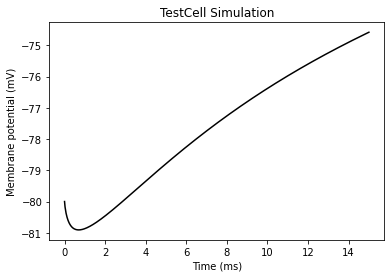

In [11]:
modelSetUp.packageModel(modelFile) # Packaging the manual tuning file modelParameter.txt into the two files for NeuroModel: parameters.json and mechanisms.json

modelCell=Neuron_model_extended.NeuronModel(cell_name=name,param_file=parameterFile,morph_file=morphologyFile,mech_file=mechanismsFile)

simulator=ephys.simulators.NrnSimulator(cvode_active=False) # In here is neuron.h., simulator.neuron.h = neuron.h. in common NEURON+python syntax

modelCell.instantiate(sim=simulator)  

vSave = simulator.neuron.h.Vector()
spikeTime = simulator.neuron.h.Vector()

"""
Record somatic voltage
"""
vSave.record(modelCell.icell.soma[0](0.5)._ref_v)
recordingSpikingActivity = simulator.neuron.h.NetCon(modelCell.icell.soma[0](0.5)._ref_v,None, sec = modelCell.icell.soma[0])
recordingSpikingActivity.threshold = 0
recordingSpikingActivity.record(spikeTime)

tSave = simulator.neuron.h.Vector()
tSave.record(simulator.neuron.h._ref_t)


"""
IClamp

"""
IClampHolding = simulator.neuron.h.IClamp(modelCell.icell.soma[0](0.5))
IClampHolding.delay = 0
IClampHolding.dur = 2000
IClampHolding.amp = -0.4257 # nA, but experiments usually use pA
IClampStimulation = simulator.neuron.h.IClamp(modelCell.icell.soma[0](0.5))
IClampStimulation.delay = 100
IClampStimulation.dur = 1000
IClampStimulation.amp = 0.4 # nA, but experiments usually use pA

simulator.neuron.h.tstop=15
simulator.neuron.h.run()

plt.figure(0)
plt.plot(tSave,vSave,label="membrane potential",c='black')
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.title("TestCell Simulation")